# Predict damage to agricultural crops

# Load and take a look at the data

In [1]:
# Load relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data
ds_train=pd.read_csv('train_agriculture.csv')
ds_test=pd.read_csv('test_agriculture.csv')

In [3]:
ds_train.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [4]:
ds_test.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [5]:
ds_train.shape

(4599, 10)

In [6]:
ds_test.shape

(1199, 9)

In [7]:
ds_train.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

In [8]:
ds_test.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
dtype: object

# Check and treat null values

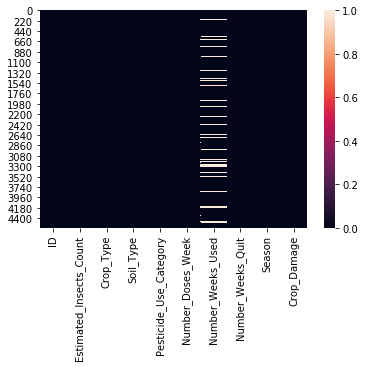

In [9]:
sns.heatmap(ds_train.isnull())

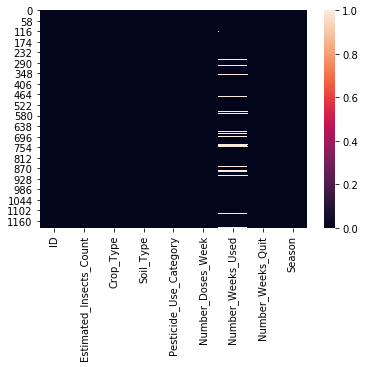

In [10]:
sns.heatmap(ds_test.isnull())

In [11]:
ds_train.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [12]:
# Replce null values with the mean value of the column
ds_train['Number_Weeks_Used'].fillna(ds_train['Number_Weeks_Used'].mean(),inplace=True)

In [13]:
# Check if the null nvalues have been filled
ds_train.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [14]:
ds_test['Number_Weeks_Used'].fillna(ds_test['Number_Weeks_Used'].mean(),inplace=True)

In [15]:
ds_test.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64

# Check correlation

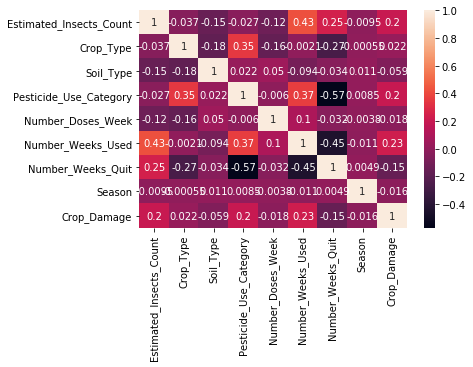

In [16]:
dscor=ds_train.corr()
sns.heatmap(dscor, annot=True)

The best correlated columns to the target column are:
    'Estimated_Insects_Count', 'Pesticide_Use_Category',  'Number_Weeks_Used'
    Followed by:
       'Crop_Type', 'Number_Doses_Week', 'Season',
    And lastly:
        'Soil_Type','Number_Weeks_Quit'

# Summary statistics

In [17]:
ds_train.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.891027,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,11.965785,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.891027,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


# Data visualizations

In [18]:
ds_train.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

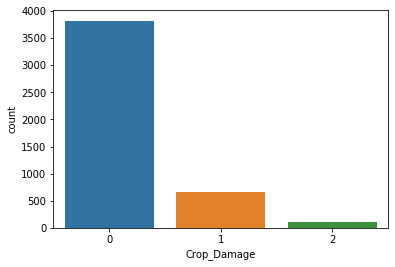

In [20]:
sns.countplot(ds_train['Crop_Damage'])

The dataset is very imbalanced.

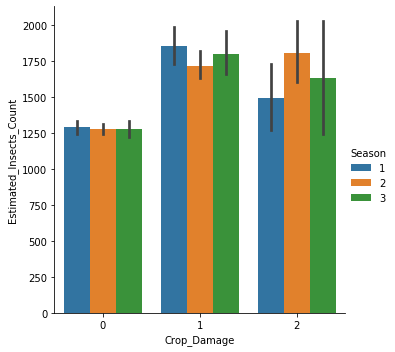

In [21]:
sns.catplot(x='Crop_Damage', y='Estimated_Insects_Count' , hue='Season', data=ds_train, kind='bar')

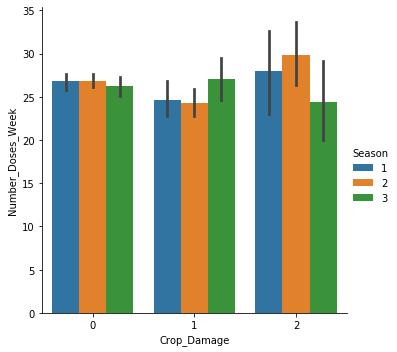

In [22]:
sns.catplot(x='Crop_Damage', y='Number_Doses_Week' , hue='Season', data=ds_train, kind='bar')

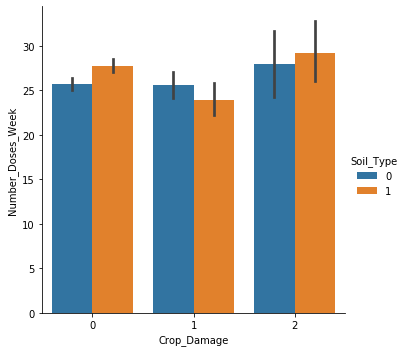

In [23]:
sns.catplot(x='Crop_Damage', y='Number_Doses_Week' , hue='Soil_Type', data=ds_train, kind='bar')

In [25]:
ds_train.groupby(['Crop_Damage'], sort=False)['Number_Doses_Week'].mean()

Crop_Damage
0    26.692408
1    24.902108
2    28.434783
Name: Number_Doses_Week, dtype: float64

# Check eveness of dataset

In [26]:
damage_counts = ds_train['Crop_Damage'].value_counts()
damage_counts

0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64

In [27]:
damage_percentage = ds_train['Crop_Damage'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
damage_percentage

0    83.1%
1    14.4%
2     2.5%
Name: Crop_Damage, dtype: object

The data is not distributed evenly over the target column.

# Drop irrelevant columns

In [28]:
ds_train.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

The best correlated columns to the target column are:
    'Estimated_Insects_Count', 'Pesticide_Use_Category',  'Number_Weeks_Used'
    Followed by:
       'Crop_Type', 'Number_Doses_Week', 'Season',
    And lastly:
        'Soil_Type','Number_Weeks_Quit'

In [159]:
# Drop irrelevant (poorly correlated) columns - dataset renamed to nds (new dataset)
nds=ds_train.drop(columns=['ID', 'Soil_Type','Number_Weeks_Quit'])

In [195]:
# Drop the same columns in the testset provided
ntest=ds_test.drop(columns=['ID', 'Soil_Type','Number_Weeks_Quit'])

# Find and remove outliers

In [160]:
nds.shape

(4599, 7)

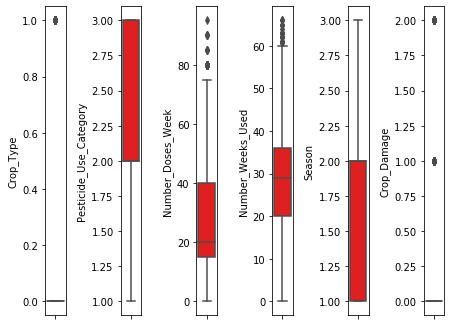

In [161]:
# Show boxplots for all columns, check outliers
collist=nds.columns.values
ncol=9
nrows=10

plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(nds[collist[i]], color='red', orient='v')
    plt.tight_layout()

In [162]:
# Remove outliers - dataset renamed to cds (clean dataset)
from scipy import stats
from scipy.stats import zscore

z_score=abs(zscore(nds))
print(nds.shape)
cds=nds.loc[(z_score<3).all(axis=1)]
print(cds.shape)

(4599, 7)
(4392, 7)


# Check and adjust skewness

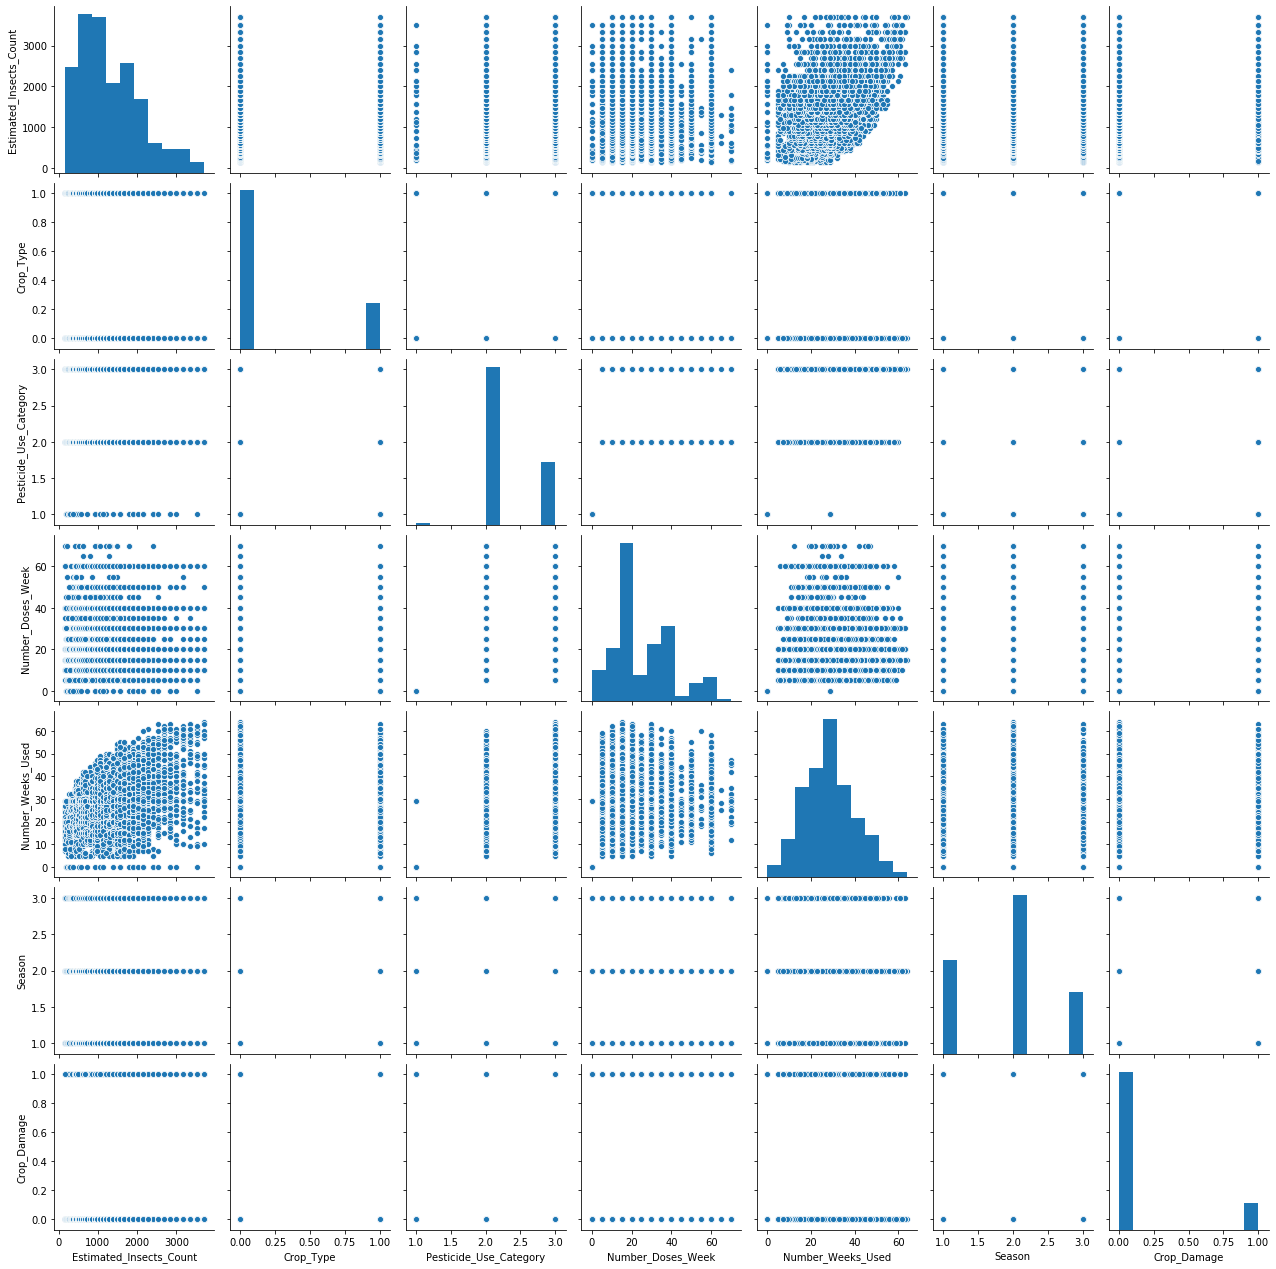

In [163]:
# Checking pairplots
sns.pairplot(cds)
plt.show()

In [164]:
# Show skewness (less than 0.55 is ok)
cds.skew()

Estimated_Insects_Count    0.794579
Crop_Type                  1.313183
Pesticide_Use_Category     0.761360
Number_Doses_Week          0.712319
Number_Weeks_Used          0.279747
Season                     0.140798
Crop_Damage                1.998607
dtype: float64

Skewness was worse after treatment so I removed it.

# Split data into x and y

In [165]:
cds.columns

Index(['Estimated_Insects_Count', 'Crop_Type', 'Pesticide_Use_Category',
       'Number_Doses_Week', 'Number_Weeks_Used', 'Season', 'Crop_Damage'],
      dtype='object')

In [166]:
# Lineup target and input values
nds_x=nds.drop(columns=['Crop_Damage'])
y=nds[['Crop_Damage']]

# Apply scaler

In [167]:
#Scaling for linear regression
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x=sc.fit_transform(nds_x)
x=pd.DataFrame(x,columns=nds_x.columns)

In [168]:
x.skew()

Estimated_Insects_Count    0.911469
Crop_Type                  1.318693
Pesticide_Use_Category     0.678586
Number_Doses_Week          0.945895
Number_Weeks_Used          0.278664
Season                     0.144841
dtype: float64

# Train-Test split

In [169]:
# Train test split
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y, random_state=55, test_size=0.20)

# Model

# Using GridSearchCV to select the best parameter

In [170]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier


In [171]:
# Best parameters for DecisionTree
from sklearn.model_selection import GridSearchCV


dt=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy')}
gd=GridSearchCV(dt,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'criterion': 'gini'}

In [172]:
# Best parameters for KNeighborsClassifier

kn=KNeighborsClassifier()
parameters={'n_neighbors':(1,30)}
gd=GridSearchCV(kn,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'n_neighbors': 30}

# Comparing classification algorithm results

In [173]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc

In [182]:
from sklearn.model_selection import cross_val_score

In [183]:
KNN=KNeighborsClassifier(n_neighbors= 29)

DT=DecisionTreeClassifier(criterion='entropy')# check random_state?


In [184]:
models=[]
models.append(('KneighborsClassifier',KNN))

models.append(('DecisionTreeClassifier',DT))


************************* KneighborsClassifier *************************

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=29, p=2,
                     weights='uniform')



Accuracy score = 0.816304347826087


cross validation score = 0.7934417921758076


classification_report
               precision    recall  f1-score   support

           0       0.83      0.98      0.90       756
           1       0.35      0.06      0.10       139
           2       0.00      0.00      0.00        25

    accuracy                           0.82       920
   macro avg       0.39      0.35      0.33       920
weighted avg       0.73      0.82      0.75       920



[[743  13   0]
 [131   8   0]
 [ 23   2   0]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



************************* DecisionTreeClassifier *************************

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy'

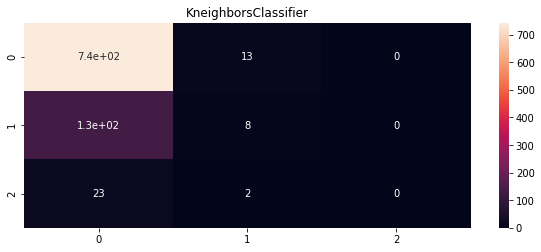

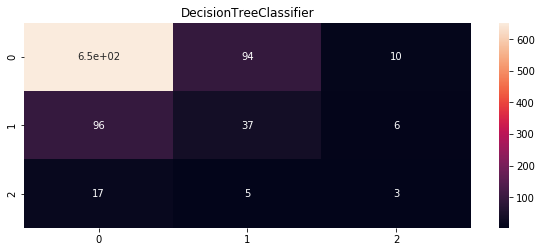

In [185]:
model_list=[]
score=[]
cvs=[]
rocscore=[]

for name, model in models:
    print('*************************',name,'*************************',end='\n\n')
   
    model_list.append(name)
    model.fit(x_train,y_train)
    print(model,end='\n\n')
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy score =',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y, cv=10, scoring='accuracy').mean()
    print('cross validation score =',sc)
    cvs.append(sc*100)
    print('\n')
    
    
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
   

    print('\n\n')

In [186]:
result=pd.DataFrame({'Model': model_list, 'Accuracy_score': score, 'Cross_val_score':cvs})
result

,Model,Accuracy_score,Cross_val_score
0,KneighborsClassifier,81.630435,79.344179
1,DecisionTreeClassifier,75.217391,70.842664


In [187]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier(n_estimators=100,random_state=42)#100 is defualt
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8021739130434783
[[710  46   0]
 [110  26   3]
 [ 19   4   2]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       756
           1       0.34      0.19      0.24       139
           2       0.40      0.08      0.13        25

    accuracy                           0.80       920
   macro avg       0.53      0.40      0.42       920
weighted avg       0.76      0.80      0.77       920



In [188]:
from sklearn.ensemble import AdaBoostClassifier
# AdaBoostClassifier(base_estimator=DecisionTreeClassifier()
#,n_estimators=50,Learning_rate=1.0)
ad= AdaBoostClassifier()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.8228260869565217
[[746  10   0]
 [128  11   0]
 [ 24   1   0]]
              precision    recall  f1-score   support

           0       0.83      0.99      0.90       756
           1       0.50      0.08      0.14       139
           2       0.00      0.00      0.00        25

    accuracy                           0.82       920
   macro avg       0.44      0.36      0.35       920
weighted avg       0.76      0.82      0.76       920



I choose the AdaboostClassifier model as my final model because it gives the best scores.

Accuracy_score = 82.3

Cross_val_score = 83.0

Roc_auc_score = 99.0

# Save the model

In [190]:
#save model as a pickle file
from sklearn.externals import joblib
joblib.dump(ad,'Agriculture.pkl')

['Agriculture.pkl']

In [196]:
# Load and use model to make a prediction with the test set provided
model=joblib.load('Agriculture.pkl')
model.predict(ntest)

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)